In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm.auto import tqdm
import scienceplots
pd.set_option('display.max_columns', None)
plt.style.use(['science','notebook']) #plt.style.use(['science','notebook'])
plt.tight_layout()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<Figure size 800x600 with 0 Axes>

In [3]:
DIR = '/Users/bijan1339/Desktop/Research/'
pickle_PATH = '/Users/bijan1339/Desktop/Research/Dataframes/'

output_directory0 = '/Users/bijan1339/Desktop/Research/Final_Output0/'
output_directory1 = '/Users/bijan1339/Desktop/Research/Final_Output1/'
output_directory4 = '/Users/bijan1339/Desktop/Research/Final_Output4/'
output_directory6 = '/Users/bijan1339/Desktop/Research/Final_Output6/'
output_directory7 = '/Users/bijan1339/Desktop/Research/Final_Output/'
output_directory8 = '/Users/bijan1339/Desktop/Research/Final_Output8/'
output_directory9 = '/Users/bijan1339/Desktop/Research/Final_Output9/'

MS_Types = [0.,1.,2.,7.,8.,9.]
RG_Types = [3.,4.,5.,6.]# Giant Branch sequences keys from SSE
WD_Types = [10.,11.,12.] #White Dwarf keys from SSE


In [4]:
df_initial0        = pd.read_pickle(pickle_PATH + 'df_initial0.pkl')
df_final0          = pd.read_pickle(pickle_PATH + 'df_final0.pkl')
merged_df_initial0 = pd.read_pickle(pickle_PATH + 'merged_df_initial0.pkl')
merged_df_final0   = pd.read_pickle(pickle_PATH + 'merged_df_final0.pkl')

df_initial1        = pd.read_pickle(pickle_PATH + 'df_initial1.pkl')
df_final1          = pd.read_pickle(pickle_PATH + 'df_final1.pkl')
merged_df_initial1 = pd.read_pickle(pickle_PATH + 'merged_df_initial1.pkl')
merged_df_final1   = pd.read_pickle(pickle_PATH + 'merged_df_final1.pkl')

df_initial6        = pd.read_pickle(pickle_PATH + 'df_initial6.pkl')
df_final6          = pd.read_pickle(pickle_PATH + 'df_final6.pkl')
merged_df_initial6 = pd.read_pickle(pickle_PATH + 'merged_df_initial6.pkl')
merged_df_final6   = pd.read_pickle(pickle_PATH + 'merged_df_final6.pkl')

df_initial7        = pd.read_pickle(pickle_PATH + 'df_initial7.pkl')
df_final7          = pd.read_pickle(pickle_PATH + 'df_final7.pkl')
merged_df_initial7 = pd.read_pickle(pickle_PATH + 'merged_df_initial7.pkl')
merged_df_final7   = pd.read_pickle(pickle_PATH + 'merged_df_final7.pkl')



In [5]:
m1_merged_df0 = merged_df_final0[merged_df_final0['m1_merged'] == True]
m2_merged_df0 = merged_df_final0[merged_df_final0['m2_merged'] == True]

m1_merged_df1 = merged_df_final1[merged_df_final1['m1_merged'] == True]
m2_merged_df1 = merged_df_final1[merged_df_final1['m2_merged'] == True]

m1_merged_df6 = merged_df_final6[merged_df_final6['m1_merged'] == True]
m2_merged_df6 = merged_df_final6[merged_df_final6['m2_merged'] == True]

m1_merged_df7 = merged_df_final7[merged_df_final7['m1_merged'] == True]
m2_merged_df7 = merged_df_final7[merged_df_final7['m2_merged'] == True]


wdwd_after_merger1 = pd.concat( [m1_merged_df1.query("startype2 == 'WD' and startype3 == 'WD'"), m2_merged_df1.query("startype1 == 'WD' and startype3 == 'WD'")])
wdwd_after_merger6 = pd.concat( [m1_merged_df6.query("startype2 == 'WD' and startype3 == 'WD'"), m2_merged_df6.query("startype1 == 'WD' and startype3 == 'WD'")])
wdwd_after_merger7 = pd.concat( [m1_merged_df7.query("startype2 == 'WD' and startype3 == 'WD'"), m2_merged_df7.query("startype1 == 'WD' and startype3 == 'WD'")])
wdwd_after_merger0 = pd.concat( [m1_merged_df0.query("startype2 == 'WD' and startype3 == 'WD'"), m2_merged_df0.query("startype1 == 'WD' and startype3 == 'WD'")])

In [6]:
binaries_WDWD = pd.read_csv(pickle_PATH + 'Table_A1.csv')[['source_id_1', 'source_id_2', 'MassH_1', 'MassH_2', 'cool_ageH_1', 'cool_ageH_2', 
                                                           'init_mass_1', 'init_mass_2','tot_age_1', 'tot_age_2', 'sep_AU', 'R_chance_align',
                                                           'e_MassH_upper_1', 'e_MassH_lower_1', 'e_cool_ageH_upper_1', 'e_cool_ageH_lower_1',
                                                           'e_init_mass_upper_1', 'e_init_mass_lower_1', 'e_tot_age_upper_1', 'e_tot_age_lower_1',
                                                           'e_MassH_upper_2', 'e_MassH_lower_2', 'e_cool_ageH_upper_2', 'e_cool_ageH_lower_2',
                                                           'e_init_mass_upper_2', 'e_init_mass_lower_2', 'e_tot_age_upper_2', 'e_tot_age_lower_2']]
binaries_WDWD.head()

,source_id_1,source_id_2,MassH_1,MassH_2,cool_ageH_1,cool_ageH_2,init_mass_1,init_mass_2,tot_age_1,tot_age_2,sep_AU,R_chance_align,e_MassH_upper_1,e_MassH_lower_1,e_cool_ageH_upper_1,e_cool_ageH_lower_1,e_init_mass_upper_1,e_init_mass_lower_1,e_tot_age_upper_1,e_tot_age_lower_1,e_MassH_upper_2,e_MassH_lower_2,e_cool_ageH_upper_2,e_cool_ageH_lower_2,e_init_mass_upper_2,e_init_mass_lower_2,e_tot_age_upper_2,e_tot_age_lower_2
0,1003080575370626944,1003080575370617728,0.647,0.599,8.0041,7.2616,2.321,1.180,8.9655,13.6651,658.372570,7.931599e-06,0.061,0.060,0.6026,0.3149,0.673,1.291,9.3585,0.5927,0.059,0.060,0.7462,0.4692,1.337,0.561,51.4788,5.6627
1,100536353946761728,100536353946762112,0.483,0.472,1.5763,1.8578,0.130,0.038,2372.2925,NaN,1677.455167,1.949616e-04,0.067,0.073,0.0987,0.1324,0.579,0.636,NaN,2333.6667,0.077,0.080,0.1471,0.1940,0.668,0.693,NaN,NaN
2,1006533767732900736,1006533763440848256,0.719,0.540,1.9364,1.1852,3.064,0.622,2.3678,58.1477,620.838313,9.181447e-07,0.055,0.060,0.1273,0.2182,0.299,0.541,0.3487,0.2413,0.051,0.051,0.0406,0.0481,0.446,0.447,1404.0893,47.9153
3,1008929564913828224,1008929569208837376,0.683,0.669,0.8133,0.5288,2.808,2.659,1.3673,1.1826,854.183094,6.642287e-06,0.040,0.042,0.0167,0.0181,0.283,0.582,0.5231,0.1340,0.034,0.035,0.0131,0.0111,0.295,0.555,0.6018,0.1748
4,1013776353903292928,1013776353903293056,0.664,0.581,0.0821,0.4362,2.594,0.986,0.7827,12.4604,667.621073,2.446192e-08,0.019,0.019,0.0029,0.0033,0.213,0.302,0.2909,0.1462,0.016,0.017,0.0056,0.0053,0.152,0.146,9.0277,4.7986


In [7]:
mergers_df1 = pd.read_pickle(DIR + 'mergers_df1').dropna(subset=['e'])
mergers_df6 = pd.read_pickle(DIR + 'mergers_df6').dropna(subset=['e'])

mergers_df1_kicks = pd.read_pickle(DIR + 'mergers_df1_kicks').dropna(subset=['e'])
mergers_df6_kicks = pd.read_pickle(DIR + 'mergers_df6_kicks').dropna(subset=['e'])


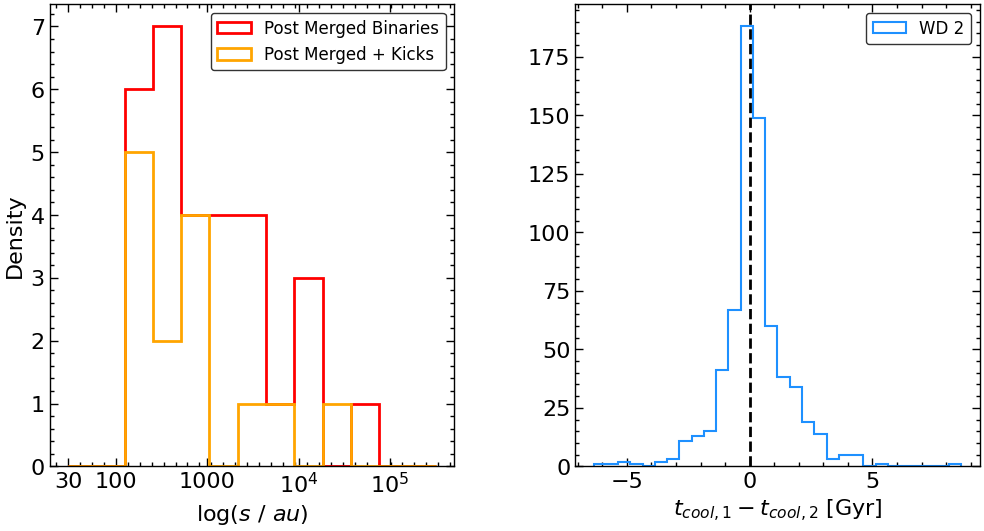

In [8]:
# smas_f = np.loadtxt(DIR + 'smas_f.txt') #from SSE_Mergers
obs_binaries = binaries_WDWD.query("(R_chance_align < 0.1)")
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6),gridspec_kw=dict(hspace=0,wspace=0.3))
(ax1, ax2) = axes

bins=np.linspace(np.log10(30),5.5,14)
# ax1.hist(np.log10(binaries_WDWD['sep_AU']),histtype='stepfilled',bins=bins,linewidth=1.5, density=True, color='gray', label='All DWDs', alpha=0.25);
# ax1.hist(np.log10(obs_binaries['sep_AU']),histtype='stepfilled',bins=bins,linewidth=1.0, density=False, color='gray', label='Strange DWDs',edgecolor='k', alpha=0.5);
ax1.hist(np.log10(mergers_df1.query("180 < a <1e6 and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=bins,linewidth=2.0, density=False, color='r', label='Post Merged Binaries');
ax1.hist(np.log10(mergers_df1_kicks.query("180 < a <1e6 and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=bins,linewidth=2.0, density=False, color='orange', label='Post Merged + Kicks');
# ax1.hist(np.log10(mergers_df1.query("180 < a < 1e6")['a'].tolist()),hi
# ()),histtype='step',bins=bins,linewidth=2.0, density=False, color='deepskyblue', label='Post Merged + Kicks');

# ax2.hist(binaries_WDWD.query("tot_age_1 < 15")['tot_age_1'],histtype='step',bins=30, density=False, color='magenta', alpha=1.0, linewidth=1.5, label='WD 1');
n, bins, patches = ax2.hist(obs_binaries.query("tot_age_2 < 14")['cool_ageH_1'] - obs_binaries.query("tot_age_2 < 14")['cool_ageH_2'],histtype='step',bins=30, density=False, color='dodgerblue', alpha=1.0, linewidth=1.5, label='WD 2');
# ax2.scatter(np.log10(binaries_WDWD['tot_age_1']), np.log10(binaries_WDWD['tot_age_2']))
# ax2.axvline(13.8, linestyle='dashed',color='k',linewidth=2.5, label='13.8 Gyr')

ax1.set_xticks([np.log10(30),2,3,4,5],['30','100','1000','10$^{4}$','10$^{5}$'])
ax1.set_xlabel('$\log(s~/~au)$')
ax1.set_ylabel('Density')
ax2.set_xlabel('$t_{cool,1} - t_{cool,2}$ [Gyr]')
ax2.axvline(0, color='k', linestyle='dashed')
# ax2.fill_between(x, -5, 0, alpha=0.3, color='gray', label='Unphysical (Triples?)')
# bins=bins[:-1]
# mask = (bins <= 0)
# ax2.fill_between(bins[mask], n[mask], color='gray', alpha=0.5, label='Shaded Area')

ax1.legend(frameon=-1, edgecolor='k',loc=1, fontsize=12)
ax2.legend(frameon=-1, edgecolor='k',loc=1, fontsize=12)

# plt.savefig(DIR + 'Figures/DWD_sep_age.pdf')

Text(0.05, 0.9, 'Model OB')

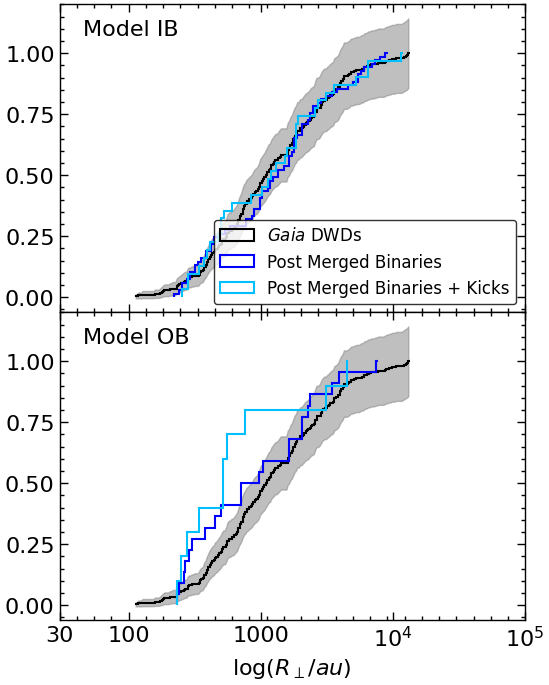

In [9]:
strange_binaries = binaries_WDWD.query("(cool_ageH_1 + 3*e_cool_ageH_upper_1) < (cool_ageH_2 - 3*e_cool_ageH_lower_2) and R_chance_align < 0.1 and sep_AU <=10**4.1")

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(6,8),gridspec_kw=dict(hspace=0,wspace=0.0), sharey=True, sharex=True)
(ax1, ax2) = axes


# n, bins, patches = ax1.hist(np.log10(binaries_WDWD['sep_AU']),histtype='stepfilled',bins=30,linewidth=1.5, density=True, color='gray', label='DWD Binaries', alpha=0.25, cumulative=True);
# patches[0].set_xy(patches[0].get_xy()[:-1])

n, bins, patches = ax1.hist(np.log10(strange_binaries['sep_AU'] * 1.10),histtype='step',bins=200,linewidth=1.5, density=True, color='k', label='$Gaia$ DWDs', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

bin_centers1 = 0.5 * (bins[1:] + bins[:-1])
y_err1 = np.sqrt(n/np.max(n)) / 7        
ax1.fill_between(bins[:-1], n-y_err1, n+y_err1, color='gray', alpha=0.5)

n, bins, patches = ax1.hist(np.log10(mergers_df6.query("220 < a < @strange_binaries.sep_AU.max() and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=80,linewidth=1.5, density=True, color='b', label='Post Merged Binaries', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

n, bins, patches = ax1.hist(np.log10(mergers_df6_kicks.query("220 < a < @strange_binaries.sep_AU.max() and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=80,linewidth=1.5, density=True, color='deepskyblue', label='Post Merged Binaries + Kicks', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

n, bins, patches = ax2.hist(np.log10(strange_binaries['sep_AU'] * 1.10),histtype='step',bins=200,linewidth=1.5, density=True, color='k', label='DWD Binaries', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

bin_centers1 = 0.5 * (bins[1:] + bins[:-1])
y_err1 = np.sqrt(n/np.max(n)) / 7        
ax2.fill_between(bins[:-1], n-y_err1, n+y_err1, color='gray', alpha=0.5)

n, bins, patches = ax2.hist(np.log10(mergers_df1.query("220 < a < @strange_binaries.sep_AU.max() and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=150,linewidth=1.5, density=True, color='b', label='Post Merged Binaries', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

n, bins, patches = ax2.hist(np.log10(mergers_df1_kicks.query("220 < a < @strange_binaries.sep_AU.max() and bintype=='WDWD'")['a'].tolist()),histtype='step',bins=150,linewidth=1.5, density=True, color='deepskyblue', label='Post Merged + Kicks', cumulative=True);
patches[0].set_xy(patches[0].get_xy()[:-1])

ax1.set_xticks([np.log10(30),2,3,4,5],['30','100','1000','10$^{4}$','10$^{5}$'])
# ax1.set_xlabel('$\log(R_\perp/au)$')
# ax1.set_ylabel('CDF')

ax2.set_xticks([np.log10(30),2,3,4,5],['30','100','1000','10$^{4}$','10$^{5}$'])
ax2.set_xlabel('$\log(R_\perp/au)$')

ax1.legend(frameon=-1, edgecolor='k',loc=4, fontsize=12)

ax1.text(0.05,0.9,'Model IB', fontsize=16, transform=ax1.transAxes)
ax2.text(0.05,0.9,'Model OB', fontsize=16, transform=ax2.transAxes)


In [26]:
!pip3 install vaex


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.9 MB 291 kB/s eta 0:00:01
     |████████████████████████████████| 43 kB 383 kB/s eta 0:00:01
     |████████████████████████████████| 58 kB 651 kB/s eta 0:00:01
     |████████████████████████████████| 333 kB 541 kB/s eta 0:00:01
     |████████████████████████████████| 395 kB 720 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 23.7 MB 91 kB/s eta 0:00:011
     |████████████████████████████████| 239 kB 473 kB/s eta 0:00:01
     |████████████████████████████████| 166 kB 807 kB/s eta 0:00:01
     |████████████████████████████████| 97 kB 644 kB/s eta 0:00:01
     |████████████████████████████████| 55 kB 430 kB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 630 kB/s eta 0:00:01
     |████████████████████████████████| 2.

In [28]:
from astropy.io import fits
import pandas as pd
import vaex

In [34]:
with fits.open('/Users/bijan1339/Desktop/all_columns_catalog.fits') as hdul:
    table = hdul[1].data  # Adjust the extension index as needed
# Convert the Astropy Table to a Pandas DataFrame
pandas_df = pd.DataFrame(table)

# Convert the Pandas DataFrame to a Vaex DataFrame
vaex_df = vaex.from_pandas(pandas_df)


In [35]:
vaex_df

#,solution_id1,solution_id2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,...,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,dr2_source_id1,dr2_source_id2,dr2_parallax1,dr2_parallax2,dr2_parallax_error1,dr2_parallax_error2,dr2_pmra1,dr2_pmra2,dr2_pmdec1,dr2_pmdec2,dr2_pmra_error1,dr2_pmra_error2,dr2_pmdec_error1,dr2_pmdec_error2,dr2_ruwe1,dr2_ruwe2
0,1636042515805110273,1636042515805110273,4282339100022417152,4282339095720590720,1360492561,1271845445,2016.0,2016.0,282.80943113005753,282.8088579357593,0.012759874,0.28606945,5.692464376105104,5.688739805905678,0.012760569,0.24214806,2.466308813127245,3.129725645547363,0.015508463,0.28737023,159.02988,10.890918,2

In [46]:
row['RA']

TypeError: tuple indices must be integers or slices, not str

In [40]:
CVs = pd.read_csv('/Users/bijan1339/Downloads/RKcatalog.csv')
CVs.columns = ['Name','RA','DEC']

In [48]:
import numpy as np

In [63]:
ra_expression1 = vaex_df['ra1']  # Convert RA column to a vaex expression
dec_expression1 = vaex_df['dec1']  # Convert DEC column to a vaex expression

ra_expression2 = vaex_df['ra2']  # Convert RA column to a vaex expression
dec_expression2 = vaex_df['dec2']  # Convert DEC column to a vaex expression

CVs_arr = np.array(CVs[['RA','DEC']])
# Define a tolerance for matching (adjust the tolerance as needed)
tolerance = 0.001  # For example, 0.001 degrees
n=0
df = pd.DataFrame()
# Loop through your numpy array
for source in CVs_arr:
    ra, dec = source  # Assuming source is a tuple or list with (RA, DEC)
    
    # Find the corresponding row in the vaex DataFrame within the tolerance range
    mask = (abs(ra_expression1 - ra) < tolerance) & (abs(dec_expression1 - dec) < tolerance) | (abs(ra_expression2 - ra) < tolerance) & (abs(dec_expression2 - dec) < tolerance)
    matched_rows = vaex_df[mask]

    if len(matched_rows) >= 1:
        df = pd.concat([df, pd.DataFrame(matched_rows)])


In [78]:
vaex_df

#,solution_id1,solution_id2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,ra_error1,ra_error2,dec1,dec2,dec_error1,dec_error2,parallax1,parallax2,parallax_error1,parallax_error2,parallax_over_error1,parallax_over_error2,pm1,pm2,pmra1,pmra2,pmra_error1,pmra_error2,pmdec1,pmdec2,pmdec_error1,pmdec_error2,ra_dec_corr1,ra_dec_corr2,ra_parallax_corr1,ra_parallax_corr2,ra_pmra_corr1,ra_pmra_corr2,ra_pmdec_corr1,ra_pmdec_corr2,dec_parallax_corr1,dec_parallax_corr2,dec_pmra_corr1,dec_pmra_corr2,dec_pmdec_corr1,dec_pmdec_corr2,parallax_pmra_corr1,parallax_pmra_corr2,parallax_pmdec_corr1,parallax_pmdec_corr2,pmra_pmdec_corr1,pmra_pmdec_corr2,astrometric_n_obs_al1,astrometric_n_obs_al2,astrometric_n_obs_ac1,astrometric_n_obs_ac2,astrometric_n_good_obs_al1,astrometric_n_good_obs_al2,astrometric_n_bad_obs_al1,astrometric_n_bad_obs_al2,astrometric_gof_al1,astrometric_gof_al2,astrometric_chi2_al1,astrometric_chi2_al2,astrometric_excess_noise1,astrometric_excess_noise2,astrometric_excess_noise_sig1,astrometric_excess_noise_sig2,astrometric_params_solved1,astrometric_params_solved2,astrometric_primary_flag1,astrometric_primary_flag2,nu_eff_used_in_astrometry1,nu_eff_used_in_astrometry2,pseudocolour1,pseudocolour2,pseudocolour_error1,pseudocolour_error2,ra_pseudocolour_corr1,ra_pseudocolour_corr2,dec_pseudocolour_corr1,dec_pseudocolour_corr2,parallax_pseudocolour_corr1,parallax_pseudocolour_corr2,pmra_pseudocolour_corr1,pmra_pseudocolour_corr2,pmdec_pseudocolour_corr1,pmdec_pseudocolour_corr2,astrometric_matched_transits1,astrometric_matched_transits2,visibility_periods_used1,visibility_periods_used2,astrometric_sigma5d_max1,astrometric_sigma5d_max2,matched_transits1,matched_transits2,new_matched_transits1,new_matched_transits2,matched_transits_removed1,matched_transits_removed2,...,scan_direction_strength_k42,scan_direction_mean_k11,scan_direction_mean_k12,scan_direction_mean_k21,scan_direction_mean_k22,scan_direction_mean_k31,scan_direction_mean_k32,scan_direction_mean_k41,scan_direction_mean_k42,duplicated_source1,duplicated_source2,phot_g_n_obs1,phot_g_n_obs2,phot_g_mean_flux1,phot_g_mean_flux2,phot_g_mean_flux_error1,phot_g_mean_flux_error2,phot_g_mean_flux_over_error1,phot_g_mean_flux_over_error2,phot_g_mean_mag1,phot_g_mean_mag2,phot_bp_n_obs1,phot_bp_n_obs2,phot_bp_mean_flux1,phot_bp_mean_flux2,phot_bp_mean_flux_error1,phot_bp_mean_flux_error2,phot_bp_mean_flux_over_error1,phot_bp_mean_flux_over_error2,phot_bp_mean_mag1,phot_bp_mean_mag2,phot_rp_n_obs1,phot_rp_n_obs2,phot_rp_mean_flux1,phot_rp_mean_flux2,phot_rp_mean_flux_error1,phot_rp_mean_flux_error2,phot_rp_mean_flux_over_error1,phot_rp_mean_flux_over_error2,phot_rp_mean_mag1,phot_rp_mean_mag2,phot_bp_n_contaminated_transits1,phot_bp_n_contaminated_transits2,phot_bp_n_blended_transits1,phot_bp_n_blended_transits2,phot_rp_n_contaminated_transits1,phot_rp_n_contaminated_transits2,phot_rp_n_blended_transits1,phot_rp_n_blended_transits2,phot_proc_mode1,phot_proc_mode2,phot_bp_rp_excess_factor1,phot_bp_rp_excess_factor2,bp_rp1,bp_rp2,bp_g1,bp_g2,g_rp1,g_rp2,dr2_radial_velocity1,dr2_radial_velocity2,dr2_radial_velocity_error1,dr2_radial_velocity_error2,dr2_rv_nb_transits1,dr2_rv_nb_transits2,dr2_rv_template_teff1,dr2_rv_template_teff2,dr2_rv_template_logg1,dr2_rv_template_logg2,dr2_rv_template_fe_h1,dr2_rv_template_fe_h2,l1,l2,b1,b2,ecl_lon1,ecl_lon2,ecl_lat1,ecl_lat2,pairdistance,sep_AU,binary_type,Sigma18,R_chance_align,dr2_source_id1,dr2_source_id2,dr2_parallax1,dr2_parallax2,dr2_parallax_error1,dr2_parallax_error2,dr2_pmra1,dr2_pmra2,dr2_pmdec1,dr2_pmdec2,dr2_pmra_error1,dr2_pmra_error2,dr2_pmdec_error1,dr2_pmdec_error2,dr2_ruwe1,dr2_ruwe2
0,1636042515805110273,1636042515805110273,4282339100022417152,4282339095720590720,1360492561,1271845445,2016.0,2016.0,282.80943113005753,282.8088579357593,0.012759874,0.28606945,5.692464376105104,5.688739805905678,0.012760569,0.24214806,2.466308813127245,3.129725645547363,0.015508463,0.28737023,159.02988,10.890918,2

In [82]:
vaex_df.get_column_names()

['solution_id1',
 'solution_id2',
 'source_id1',
 'source_id2',
 'random_index1',
 'random_index2',
 'ref_epoch1',
 'ref_epoch2',
 'ra1',
 'ra2',
 'ra_error1',
 'ra_error2',
 'dec1',
 'dec2',
 'dec_error1',
 'dec_error2',
 'parallax1',
 'parallax2',
 'parallax_error1',
 'parallax_error2',
 'parallax_over_error1',
 'parallax_over_error2',
 'pm1',
 'pm2',
 'pmra1',
 'pmra2',
 'pmra_error1',
 'pmra_error2',
 'pmdec1',
 'pmdec2',
 'pmdec_error1',
 'pmdec_error2',
 'ra_dec_corr1',
 'ra_dec_corr2',
 'ra_parallax_corr1',
 'ra_parallax_corr2',
 'ra_pmra_corr1',
 'ra_pmra_corr2',
 'ra_pmdec_corr1',
 'ra_pmdec_corr2',
 'dec_parallax_corr1',
 'dec_parallax_corr2',
 'dec_pmra_corr1',
 'dec_pmra_corr2',
 'dec_pmdec_corr1',
 'dec_pmdec_corr2',
 'parallax_pmra_corr1',
 'parallax_pmra_corr2',
 'parallax_pmdec_corr1',
 'parallax_pmdec_corr2',
 'pmra_pmdec_corr1',
 'pmra_pmdec_corr2',
 'astrometric_n_obs_al1',
 'astrometric_n_obs_al2',
 'astrometric_n_obs_ac1',
 'astrometric_n_obs_ac2',
 'astrometric_n_

In [83]:
df.columns = vaex_df.get_column_names()[:-1]
df

,solution_id1,solution_id2,source_id1,source_id2,random_index1,random_index2,ref_epoch1,ref_epoch2,ra1,ra2,...,dr2_parallax_error2,dr2_pmra1,dr2_pmra2,dr2_pmdec1,dr2_pmdec2,dr2_pmra_error1,dr2_pmra_error2,dr2_pmdec_error1,dr2_pmdec_error2,dr2_ruwe1
0,1.636043e+18,1.636043e+18,2.699191e+18,2.699191e+18,9.817419e+08,1.114927e+09,2016.0,2016.0,321.051824,321.050238,...,-0.414022,-0.519630,-3.981941,-3.917493,0.087637,0.174232,0.108856,0.207691,1.318601,1.153399
0,1.636043e+18,1.636043e+18,4.294249e+18,4.294249e+18,1.311832e+09,8.805164e+08,2016.0,2016.0,292.711482,292.711081,...,-2.867523,-3.334984,-10.443200,-9.128413,0.068526,0.301970,0.044513,0.239940,1.135109,1.399299
0,1.636043e+18,1.636043e+18,4.062657e+18,4.063385e+18,1.403468e+09,4.685510e+08,2016.0,2016.0,268.971924,268.909001,...,1.139333,0.497182,-6.977179,-7.637593,0.108339,0.419549,0.087205,0.365318,0.894196,1.824592
0,1.636043e+18,1.636043e+18,6.544371e+18,6.544371e+18,3.303216e+08,7.827281e+08,2016.0,2016.0,341.800171,341.800130,...,23.981193,23.265611,0.197822,0.222688,0.069205,0.205102,0.066090,0.194724,1.194546,1.969844
0,1.636043e+18,1.636043e+18,3.250518e+17,3.250518e+17,1.648023e+09,8.685301e+08,2016.0,2016.0,35.389453,35.388402,...,-10.854294,-10.326435,-13.398329,-13.296206,0.098635,0.641438,0.101941,0.584585,0.868461,1.029268
0,1.636043e+18,1.636043e+18,4.804695e+18,4.804695e+18,1.520788e+09,1.642466e+09,2016.0,2016.0,85.834736,85.833822,...,1.092860,1.268425,-0.693539,-0.621452,0.062928,0.059999,0.059427,0.061958,1.098043,1.022398
0,1.636043e+18,1.636043e+18,2.014349e+18,2.014349e+18,1.158852e+09,1.690040e+09,2016.0,2016.0,344.032147,344.035331,...,14.006963,13.850807,7.585764,7.963187,0.028640,0.032987,0.026652,0.030478,0.946089,1.033369
0,1.636043e+18,1.636043e+18,2.565602e+18,2.565602e+18,1.218437e+09,8.947548e+08,2016.0,2016.0,24.231112,24.223483,...,6.637538,6.751002,-4.551904,-4.396550,0.118805,0.223760,0.072898,0.144402,1.245840,0.937327
0,1.636043e+18,1.636043e+18,6.688625e+18,6.688625e+18,7.634188e+07,9.521379e+08,2016.0,2016.0,296.919051,296.921264,...,30.175917,31.292013,-40.657328,-40.201054,0.131501,0.202688,0.091840,0.151941,1.123878,1.401236
0,1.636043e+18,1.636043e+18,4.339399e+18,4.339399e+18,1.183959e+09,1.739074e+09,2016.0,2016.0,254.123352,254.122055,...,-16.483771,-15.017547,8.998640,10.907181,0.109053,1.447941,0.062618,0.941083,1.387061,1.150937
